In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## reading file

In [3]:
missing_values = ['missing','N\\a','N\a','Na','Null','-', np.nan]
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\credit_data_training.csv', encoding='latin1',na_values = missing_values)

In [4]:
df.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1


In [5]:
## inspecting data

In [6]:
df.shape

(500, 20)

In [7]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

In [8]:
df.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [9]:
## handling missing values

In [10]:
df['Duration-in-Current-address'].unique()

array([ 2.,  1., nan,  3.,  4.])

In [11]:
mod = df['Duration-in-Current-address'].mode()[0]

In [12]:
df['Duration-in-Current-address'].fillna(mod, inplace = True)

In [13]:
df['Age-years'].unique()

array([nan, 29., 42., 37., 27., 52., 24., 22., 28., 23., 39., 36., 50.,
       43., 62., 40., 75., 31., 56., 33., 34., 30., 41., 32., 44., 45.,
       68., 46., 35., 26., 51., 25., 67., 59., 48., 74., 64., 70., 57.,
       20., 58., 38., 66., 21., 65., 47., 19., 54., 55., 61., 60., 49.,
       63., 53.])

In [14]:
mean_age = df['Age-years'].mean().round()

In [15]:
df['Age-years'].fillna(mean_age, inplace = True)

In [16]:
df.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [17]:
## checking the relationship between account balance and credit application result

In [18]:
pd.crosstab(df['Account-Balance'], df['Credit-Application-Result'], margins = True)

Credit-Application-Result,Creditworthy,Non-Creditworthy,All
Account-Balance,,,
No Account,152,110,262
Some Balance,206,32,238
All,358,142,500


In [19]:
### here we can see that people who have some balance are more likely to be creditworthy

In [20]:
## checking the relationship between payment of previous credit and credit application result

In [21]:
pd.crosstab(df['Payment-Status-of-Previous-Credit'], df['Credit-Application-Result'], margins = True)

Credit-Application-Result,Creditworthy,Non-Creditworthy,All
Payment-Status-of-Previous-Credit,,,
No Problems (in this bank),162,42,204
Paid Up,185,75,260
Some Problems,11,25,36
All,358,142,500


In [22]:
# Applicants with a clean payment history (No Problems or Paid Up) 
# are more likely to be creditworthy, while those with some problems in 
#their previous credit history may face a higher risk of being non-creditworthy.

In [23]:
## checking the relationship between Length-of-current-employment and credit application result

In [24]:
pd.crosstab(df['Length-of-current-employment'], df['Credit-Application-Result'], margins = True)

Credit-Application-Result,Creditworthy,Non-Creditworthy,All
Length-of-current-employment,,,
1-4 yrs,76,21,97
4-7 yrs,94,30,124
< 1yr,188,91,279
All,358,142,500


In [25]:
### longer durations of current employment (1-4 years and 4-7 years) 
# are generally associated with higher creditworthiness. However, applicants 
# with less than 1 year of employment may have a higher risk of non-creditworthiness.

In [26]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,36.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [27]:
df['Guarantors'].unique()

array(['None', 'Yes'], dtype=object)

In [28]:
## checking the relationship between Guarantors and credit application result

In [29]:
pd.crosstab(df['Guarantors'], df['Credit-Application-Result'], margins = True)

Credit-Application-Result,Creditworthy,Non-Creditworthy,All
Guarantors,,,
None,330,127,457
Yes,28,15,43
All,358,142,500


In [30]:
## we have very few no. of applicants with gurrantors, among them most of them are still creditworthy
## applicants without gurrantors are high, among them, most of them are still creditworthy
## it means that having or not having gurrantors, alone, doesn't have a significant impact on credit-Application-Result

In [31]:
## checking the outliers in credit amount

<Axes: >

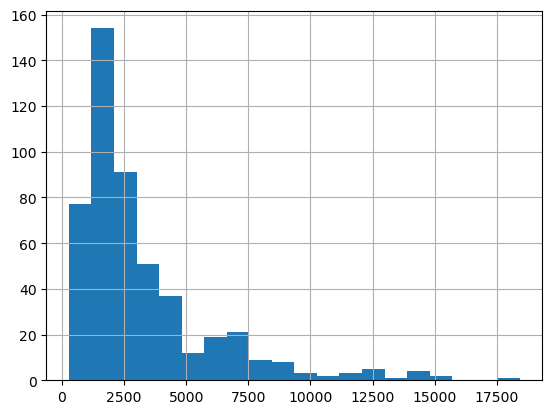

In [32]:
df['Credit-Amount'].hist(bins =20)

In [33]:
## the graph of Credit_amount is skewed on the left side, so it has outliers and we need to normalize it

In [34]:
df['Credit_amount_log'] = np.log(df['Credit-Amount'])

<Axes: >

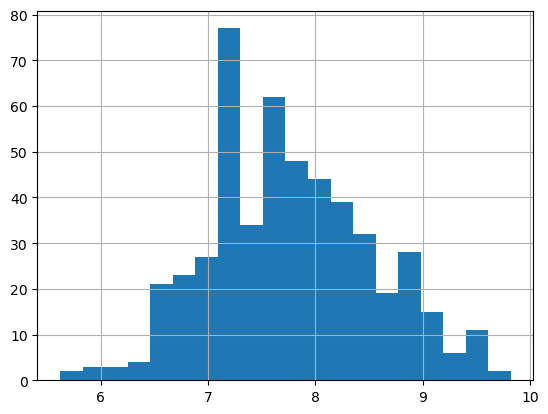

In [35]:
df['Credit_amount_log'].hist(bins = 20)

In [36]:
## now the credit amount is normalized

In [37]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,...,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Credit_amount_log
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,...,1,36.0,Other Banks/Depts,2,1,1,2,1,2,7.309212
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,...,1,29.0,Other Banks/Depts,2,1,1,2,1,2,7.309212
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,...,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1,7.342132
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,...,1,37.0,Other Banks/Depts,2,1,1,2,1,1,8.125631
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,...,1,27.0,Other Banks/Depts,2,1,1,1,1,1,5.837730


In [38]:
df['Value-Savings-Stocks'].unique()

array(['£100-£1000', 'None', '< £100'], dtype=object)

In [39]:
## checking the relationship between Value-Savings-Stocks and Credit-Application-Result

In [40]:
pd.crosstab(df['Value-Savings-Stocks'], df['Credit-Application-Result'], margins = True)

Credit-Application-Result,Creditworthy,Non-Creditworthy,All
Value-Savings-Stocks,,,
< £100,36,12,48
None,195,103,298
£100-£1000,127,27,154
All,358,142,500


In [41]:
#having a small or moderate amount of savings might be
# associated with creditworthiness. However, the absence of savings (None) doesn't necessarily imply non-creditworthiness
# it means that Value-Savings-Stocks, alone, doesn't have a significant impact on Credit-Application-Result

In [42]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,...,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Credit_amount_log
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,...,1,36.0,Other Banks/Depts,2,1,1,2,1,2,7.309212
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,...,1,29.0,Other Banks/Depts,2,1,1,2,1,2,7.309212
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,...,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1,7.342132
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,...,1,37.0,Other Banks/Depts,2,1,1,2,1,1,8.125631
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,...,1,27.0,Other Banks/Depts,2,1,1,1,1,1,5.837730


In [43]:
# now when we have handled missing values and have also normalized outliers, 
# lets divide out dataset into independent and dependent variables

In [44]:
x = df.drop(['Credit-Amount', 'Credit-Application-Result'], axis =1)

In [45]:
x.head(2)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Credit_amount_log
0,Some Balance,4,Paid Up,Other,£100-£1000,< 1yr,1,None,2.0,1,36.0,Other Banks/Depts,2,1,1,2,1,2,7.309212
1,Some Balance,4,Paid Up,Home Related,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2,7.309212


In [52]:
x.columns

Index(['Account-Balance', 'Duration-of-Credit-Month',
       'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker', 'Credit_amount_log'],
      dtype='object')

In [101]:
## we need to convert catagorical values into numeric ones, we will use one hot encoding for that

In [55]:
cols_num = ['Duration-of-Credit-Month', 'Instalment-per-cent', 'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years',  'Type-of-apartment', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker', 'Credit_amount_log' ]

In [56]:
cols_cat = ['Account-Balance', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment',  'Guarantors',  'Concurrent-Credits', 'No-of-Credits-at-this-Bank' ]

In [57]:
col_new_cat = pd.get_dummies(df[cols_cat], drop_first = False)
col_new_cat.head()

,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_None,Guarantors_Yes,Concurrent-Credits_Other Banks/Depts,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0
2,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0
4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0


In [58]:
x = pd.concat([x, col_new_cat], axis =1)

In [59]:
cols_all_cat = list(col_new_cat.columns)

In [61]:
x[cols_all_cat].head()

,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,Guarantors_None,Guarantors_Yes,Concurrent-Credits_Other Banks/Depts,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0
2,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0
4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0


In [62]:
x[cols_num + cols_all_cat].isnull().sum().sort_values(ascending = False)

Duration-of-Credit-Month                                        0
Purpose_Home Related                                            0
No-of-Credits-at-this-Bank_1                                    0
Concurrent-Credits_Other Banks/Depts                            0
Guarantors_Yes                                                  0
Guarantors_None                                                 0
Length-of-current-employment_< 1yr                              0
Length-of-current-employment_4-7 yrs                            0
Length-of-current-employment_1-4 yrs                            0
Value-Savings-Stocks_£100-£1000                                 0
Value-Savings-Stocks_None                                       0
Value-Savings-Stocks_< £100                                     0
Purpose_Used car                                                0
Purpose_Other                                                   0
Purpose_New car                                                 0
Payment-St

In [68]:
cols_input = cols_num + cols_all_cat
x = x[cols_input]

In [69]:
y = df[['Credit-Application-Result']]
y.head(2)

,Credit-Application-Result
0,Creditworthy
1,Creditworthy


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

In [49]:
#  now lets implement the model

In [71]:
param_grid = {'max_depth': np.arange(1,10)}

In [72]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [73]:
model.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [74]:
print("Best parameter in Grid Search" , model.best_params_)

Best parameter in Grid Search {'max_depth': 4}


In [108]:
predictions = model.predict(x_test)
predictions

array(['Creditworthy', 'Creditworthy', 'Creditworthy', 'Non-Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Non-Creditworthy',
       'Creditworthy', 'Non-Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Non-Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Non-Creditworthy', 'Creditworthy', 'Creditworthy',
       'Creditworthy', 'Creditworthy', 'Creditworthy', 'C

In [75]:
model.score(x_test,y_test)

0.79

In [79]:
model.score(x_train,y_train)

0.8125

In [102]:
## the model is 79% accurate on testing data, so it is a reliable model